# Importing Essential Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

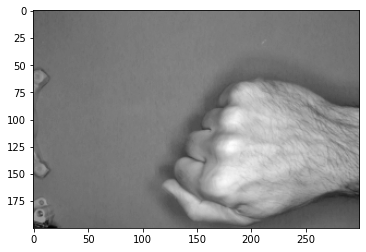

In [2]:
# This cell is used to show an image from the dataset. 

# DATADIR = r"C:\Users\markn\OneDrive\Desktop\Spring 2021\CS 4662 - Advanced Machine Learning\RPS"
DATADIR = r'./kaggle-rps'
# subfolders in RPS folder
CATEGORIES = ["rock", "paper", "scissors"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # paths to RPS dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # changing to grayscale so its faster processing.
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array)

[[88 88 86 ... 95 94 93]
 [87 89 86 ... 96 94 95]
 [86 87 89 ... 96 96 95]
 ...
 [28 33 60 ... 85 85 85]
 [26 28 31 ... 85 85 86]
 [26 32 31 ... 86 86 86]]


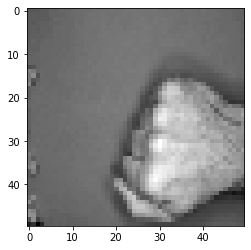

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

# Creating the training set and giving it a label

In [5]:
# creating the training set, getting the dimensions of the image, 
# and giving it a label based on it being rock, paper, or scissors.

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # paths to RPS dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [6]:
print(len(training_data))

2188


# Shuffle the training set

In [7]:
import random

# shuffles the training set.
random.shuffle(training_data)

In [8]:
# shows that the training set is shuffled
for sample in training_data[:10]:
    print(sample[1])

2
2
2
0
0
0
2
2
2
0


# Creating training and testing set

In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# import note: the 1 at the end represents grayscale. if using color,
# make sure to use 3 instead of 1. 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# One hot encoding the lables

In [12]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = y #REPLACE THIS LINE WITH YOUR ARRAY


data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[2 2 2 ... 2 0 1]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
2


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.3, random_state=2)

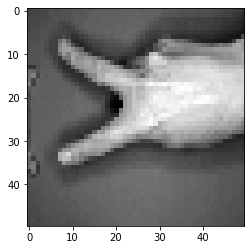

[0. 0. 1.]


In [14]:
plt.imshow(X_train[10], cmap="gray")
plt.show()
print(y_train[10])

In [15]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1531, 50, 50, 1)
(657, 50, 50, 1)
(1531, 3)
(657, 3)


In [16]:
print(X.shape)

(2188, 50, 50, 1)


In [17]:
print(encoded.shape)

(2188, 3)


# Creating ConvNet Neural Network

In [18]:
model = Sequential ([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X.shape[1:])),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Dropout(0.15),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
fitted_model = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.25)

Epoch 1/100
36/36 [==============================] - 3s 79ms/step - loss: 37.2051 - accuracy: 0.3494 - val_loss: 1.0989 - val_accuracy: 0.3003
Epoch 2/100
36/36 [==============================] - 2s 53ms/step - loss: 1.1050 - accuracy: 0.3521 - val_loss: 1.0994 - val_accuracy: 0.3029
Epoch 3/100
36/36 [==============================] - 2s 53ms/step - loss: 1.0939 - accuracy: 0.3796 - val_loss: 1.1012 - val_accuracy: 0.3446
Epoch 4/100
36/36 [==============================] - 2s 51ms/step - loss: 0.9951 - accuracy: 0.5013 - val_loss: 0.8589 - val_accuracy: 0.7128
Epoch 5/100
36/36 [==============================] - 2s 51ms/step - loss: 0.7524 - accuracy: 0.6980 - val_loss: 0.6949 - val_accuracy: 0.7885
Epoch 6/100
36/36 [==============================] - 2s 51ms/step - loss: 0.6153 - accuracy: 0.7656 - val_loss: 0.5545 - val_accuracy: 0.8329
Epoch 7/100
36/36 [==============================] - 2s 50ms/step - loss: 0.4113 - accuracy: 0.8382 - val_loss: 0.4834 - val_accuracy: 0.8486
Epoch

36/36 [==============================] - 2s 58ms/step - loss: 0.0300 - accuracy: 0.9925 - val_loss: 0.2748 - val_accuracy: 0.9556
Epoch 59/100
36/36 [==============================] - 2s 57ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.2890 - val_accuracy: 0.9634
Epoch 60/100
36/36 [==============================] - 2s 55ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.2856 - val_accuracy: 0.9661
Epoch 61/100
36/36 [==============================] - 2s 55ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.3062 - val_accuracy: 0.9634
Epoch 62/100
36/36 [==============================] - 2s 56ms/step - loss: 0.0082 - accuracy: 0.9955 - val_loss: 0.4360 - val_accuracy: 0.9608
Epoch 63/100
36/36 [==============================] - 2s 53ms/step - loss: 0.0349 - accuracy: 0.9862 - val_loss: 0.2946 - val_accuracy: 0.9634
Epoch 64/100
36/36 [==============================] - 2s 54ms/step - loss: 0.0142 - accuracy: 0.9936 - val_loss: 0.3434 - val_accuracy: 0.9452
Epoch 65/100

# CNN Evaluation

In [22]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 10ms/step - loss: 0.3235 - accuracy: 0.9543


[0.32348597049713135, 0.9543378949165344]

# ROC Curve

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


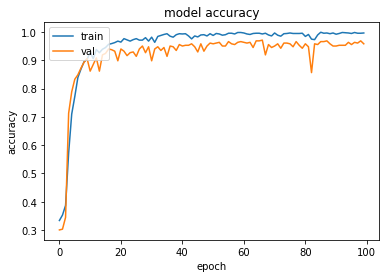

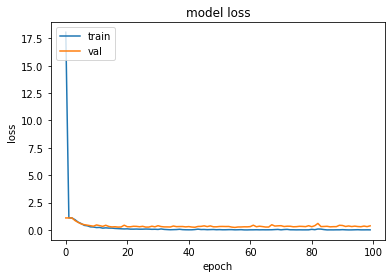

In [23]:
history_dict = fitted_model.history
print(history_dict.keys())

plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Webcam Demo

opencv_frame_0.png written!


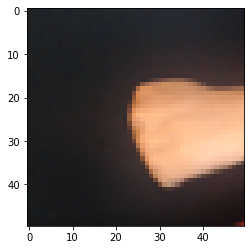

1/1 [==============================] - 0s 80ms/step
THIS IS ROCK
opencv_frame_1.png written!


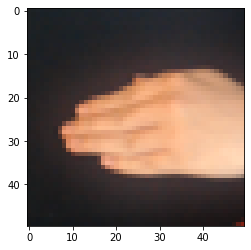

1/1 [==============================] - 0s 12ms/step
THIS IS PAPER
opencv_frame_2.png written!


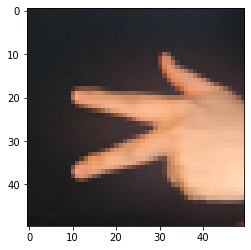

1/1 [==============================] - 0s 12ms/step
THIS IS SCISSORS


In [24]:
import cv2 
import imutils
from PIL import Image, ImageOps

camera = cv2.VideoCapture(0)

top, right, bottom, left = 10, 350, 255, 590

thickness = 2

img_counter = 0

while(camera.isOpened()):
    
    (grabbed, frame) = camera.read()
    
    frame = imutils.resize(frame, width=700)
    
    frame = cv2.flip(frame, 1)
    
    clone = frame.copy()
    
#     (height, width) = frame.shape[:2]
    
#     roi = frame[top:bottom, right:left]
    
    image_area = cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), thickness)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.imshow("Video Feed", clone)
    
    keypress = cv2.waitKey(1)
    
    if keypress%256 == 32:
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, image_area)
        print("{} written!".format(img_name))
        
        taken_img = Image.open(img_name)

        width, height = taken_img.size


        cropped_image = taken_img.crop((right+thickness,top+thickness,left-thickness,bottom-thickness))

        cropped_image = cropped_image.resize((50,50)).rotate(90)

        plt.imshow(cropped_image, cmap="gray")
        plt.show()
        
        cropped_image = ImageOps.grayscale(cropped_image)
        
        test_image = np.array(cropped_image)

        test_image = test_image.reshape(-1,50,50,1)

        predictions = model.predict(test_image, verbose=1)
        
        predict_max = argmax(predictions)
        
        if predict_max == 0:
            print("THIS IS ROCK")
        elif predict_max == 1:
            print("THIS IS PAPER")
        else:
            print("THIS IS SCISSORS")
        
        os.remove('./'+img_name)
        img_counter+=1
    elif keypress & 0xFF == ord('q'):
        break
        
        
camera.release()
cv2.destroyAllWindows()